<pre>Team : Divyesh Patel<br>
       Tushar Patel<br>
       Diya Patel<br>
       Mahir Patel<br>
       Meet Motta<br></pre>
<!--  -->
Subject : PBL Review
<!--  -->
Case Study on Hardware_Performance

First I have imported the packages(libraries) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

after importing the libraries, I have used pandas library to read csv file and stored it in the variable *machine_df* to show the output *machine_df* is written again on next line.

In [3]:
machine_df = pd.read_csv("machine.csv")
machine_df

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


Attribute Understanding:
<!--  -->
*vendor name*: 30
<!--  -->
      (adviser, amdahl, apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
<!--  -->
*Model Name*: many unique symbols
<!--  -->
*MYCT*: machine cycle time in nanoseconds (integer)
<!--  -->
*MMIN*: minimum main memory in kilobytes (integer)
<!--  -->
*MMAX*: maximum main memory in kilobytes (integer)
<!--  -->
*CACH*: cache memory in kilobytes (integer)
<!--  -->
*CHMIN*: minimum channels in units (integer)
<!--  -->
*CHMAX*: maximum channels in units (integer)
<!--  -->
*PRP*: published relative performance (integer)
<!--  -->
*ERP*: estimated relative performance from the original article (integer)


In [15]:
model = machine_df.Model_Name.unique()
print(len(model))

209


As per the above knowledge of attributes I first founded unique *Vendor_Names*.

In [12]:
machine_df.Vendor_Name.unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

after finding vendor names I have searched for the variety of *Model_Name* with each vendor in the data

In [5]:
vename = machine_df.groupby('Vendor_Name')
vename.Model_Name.value_counts()

Vendor_Name  Model_Name   
adviser      32/60            1
amdahl       470v/7           1
             470v/7a          1
             470v/7b          1
             470v/7c          1
                             ..
sperry       80/8             1
             90/80-model-3    1
sratus       32               1
wang         vs-100           1
             vs-90            1
Name: Model_Name, Length: 209, dtype: int64

As I had many attributes with int value so *.describe()* was used to calculate and dataframe the following data. the output is stored in *fltr_desb* 

In [6]:
fltr_desb = machine_df.describe()
fltr_desb

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


by getting all the information I wanted to initiate my study is done, now I have picked out top 5 models with respect to its *PRP(published relative performance)*.

In [7]:
df_sort = machine_df.sort_values('PRP',ascending = False)
final = df_sort.head()
final

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
199,sperry,1100/94,30,8000,64000,128,12,176,1150,978
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
198,sperry,1100/93,30,8000,64000,96,12,176,915,919
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
156,nas,as/9060,30,16000,32000,256,16,24,510,603


Here we can see that there is some difference between *PRP(published relative performance)* and *ERP(estimated relative performance)* which is reltated to performance.
<!--  -->
*PRP(published relative performance)* : on paper performance specification count
<!--  -->
*ERP(estimated relative performance)* : estimated performance count
<!--  -->
we can say that some modeles are working better Than *PRP* except 1
<!--  -->
we have our top 3 vendors:
<!--  -->
        1. sperry.
<!--  -->
            Model_Name:
<!--  -->
                1. 1100/94.
<!--  -->
                2. 1100/93.
<!--  -->
        2. amdahl.
<!--  -->
            Model_Name:
<!--  -->
                1. 580-5880.
<!--  -->
                2. 580-5860.
<!--  -->
        3. nas.
<!--  -->
            Model_Name:
<!--  -->
                1. as/9060.

I have stored each element in thier respective variable to covert the dataframe into the list for ease in plotting graph

In [8]:
Vendor_name = np.array(list(final.Vendor_Name.unique()))
Model_name = np.array(list(final.Model_Name))
MYCT = np.array(list(final.MYCT))
MMIN = np.array(list(final.MMIN))
MMAX = np.array(list(final.MMAX))
CACH = np.array(list(final.CACH))
CHMIN = np.array(list(final.CHMIN))
CHMAX = np.array(list(final.CHMAX))
PRP = np.array(list(final.PRP))
ERP = np.array(list(final.ERP))

In [9]:
final[['Model_Name', 'MYCT']]
var = dict(zip(Vendor_name,['yellow','green','red']))
var
var1 = [Patch(color=i,label = j ) for j,i in var.items()]


according to the numbers of the top five models I have plotted graphs for every different *int* attribute at y-axis

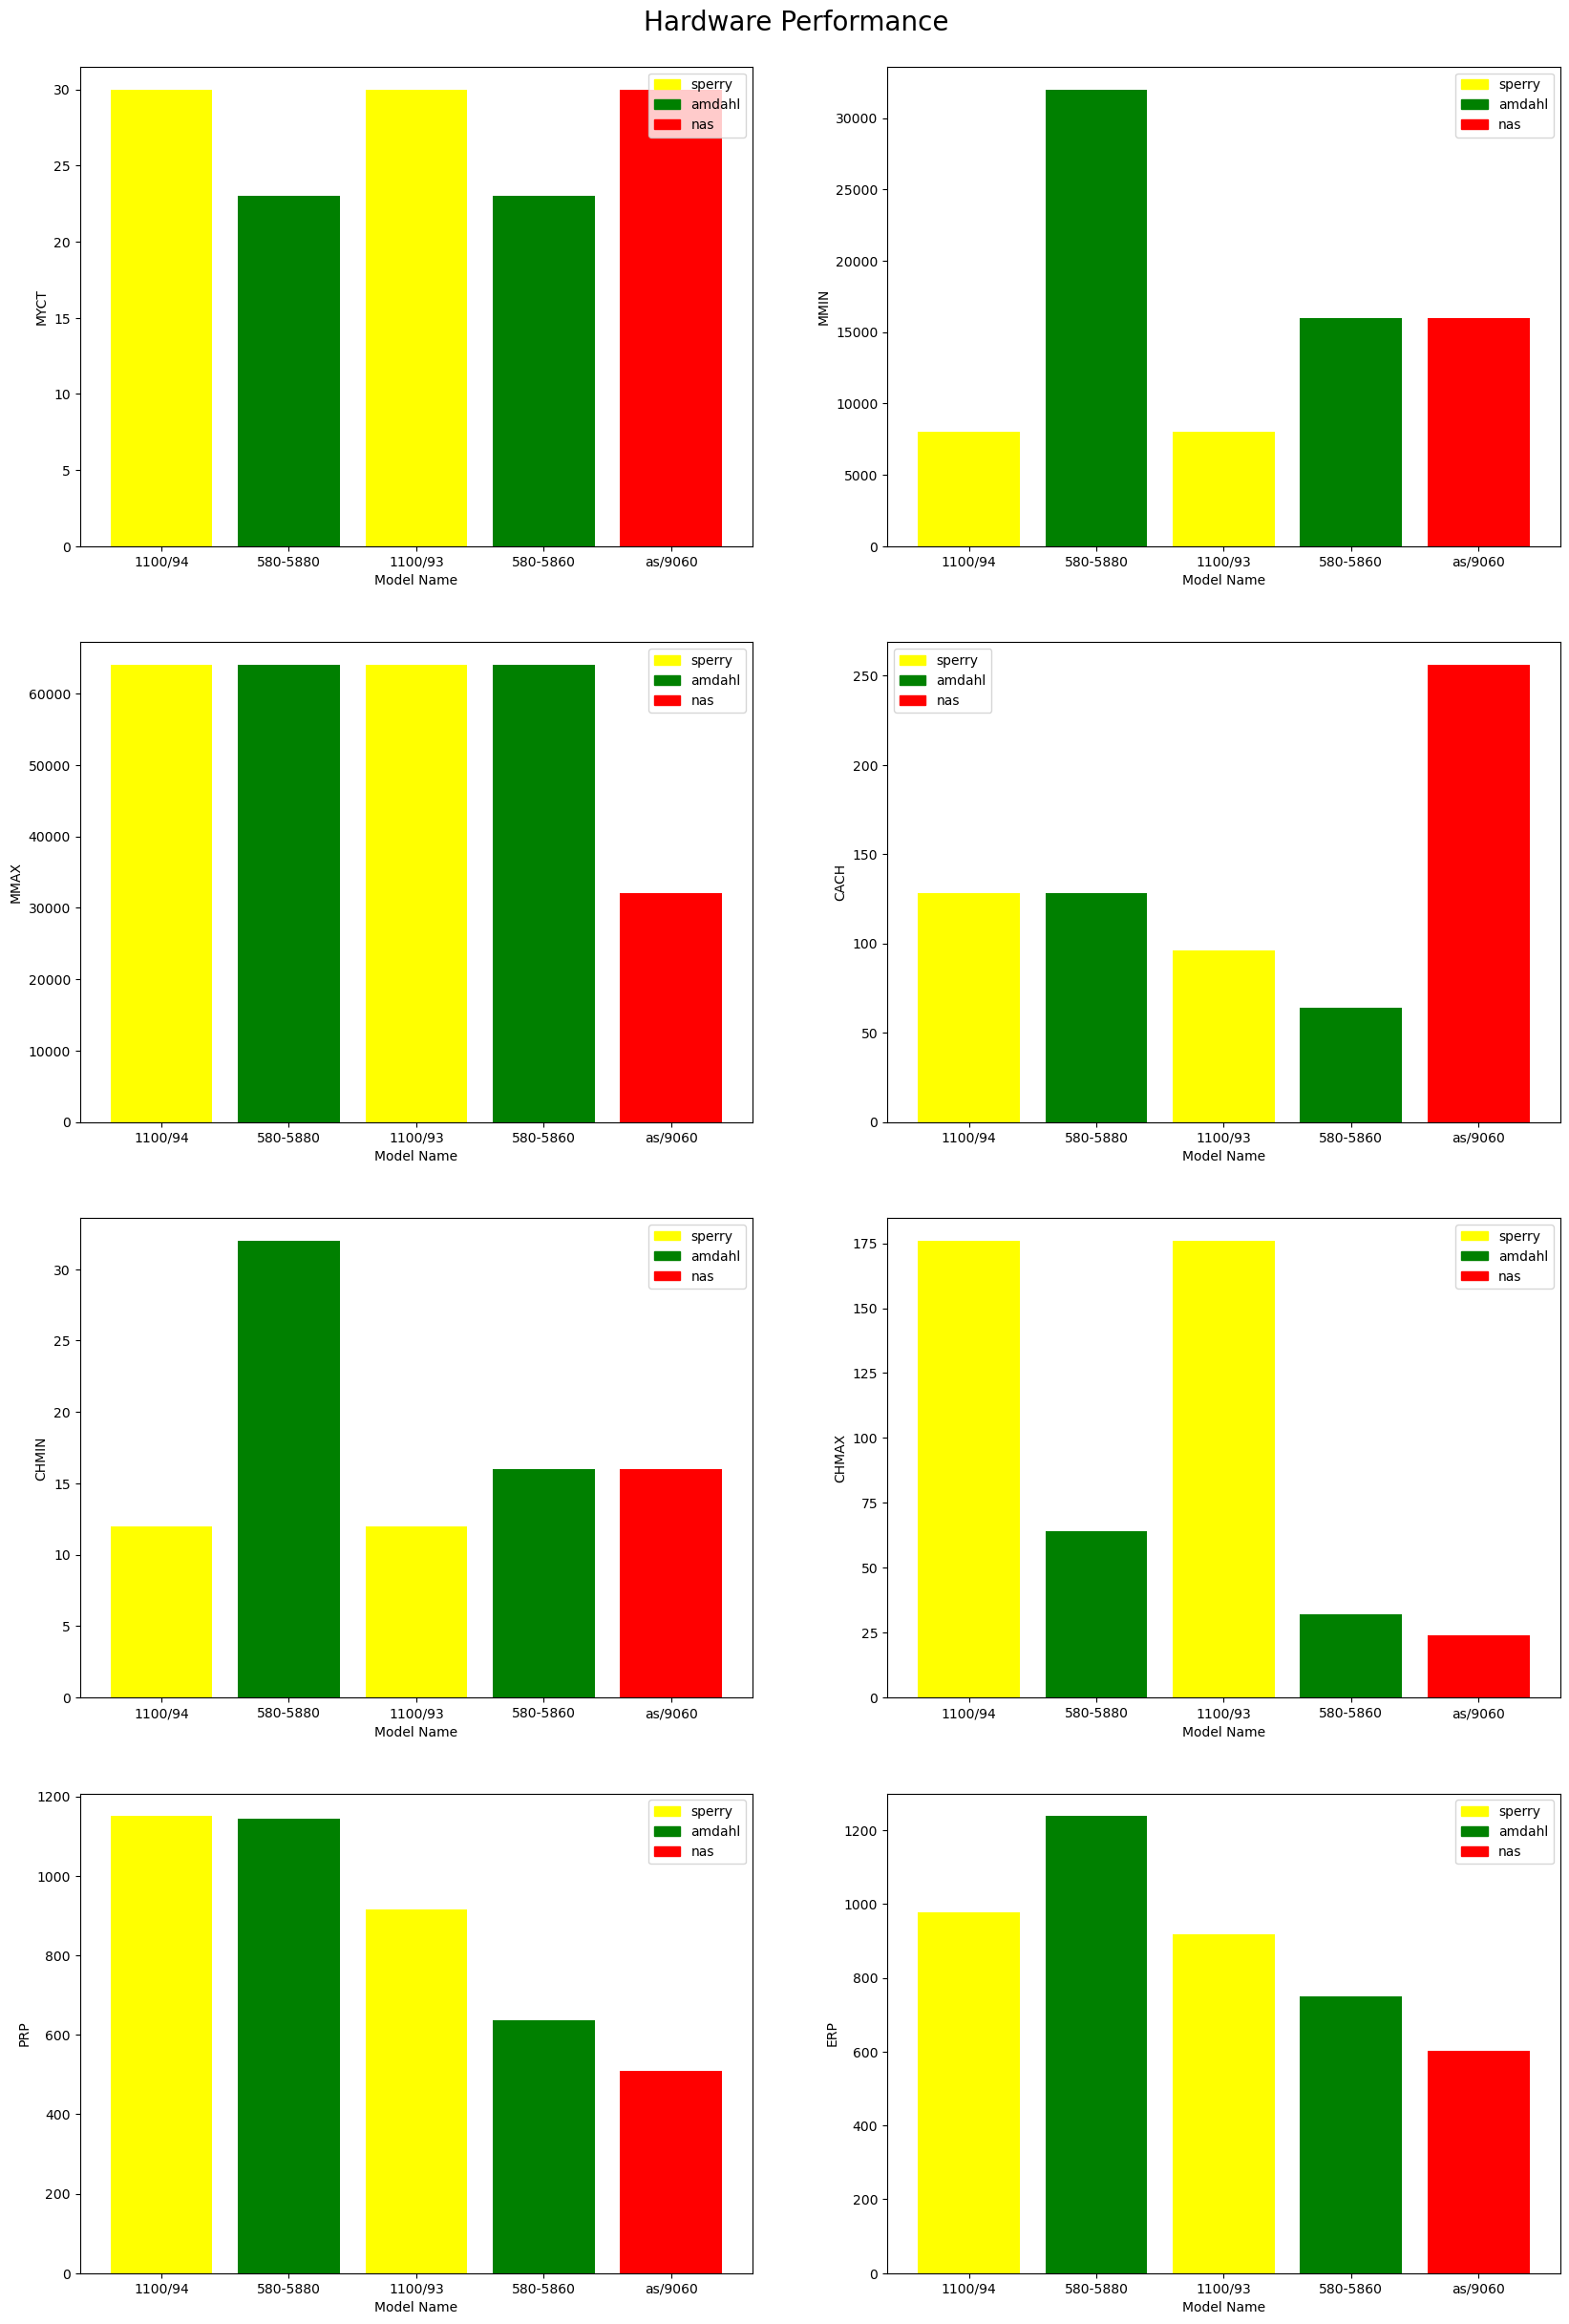

In [10]:
plt.figure(figsize=(20,30))
plt.suptitle('Hardware Performance',fontsize = 20,y = 0.90)
plt.subplot(4,2,1)
plt.xlabel("Model Name")
plt.ylabel("MYCT")
plt.bar(Model_name,MYCT,color = ["yellow","green","Yellow","green","red"])
plt.legend(handles = var1)

plt.subplot(4,2,2)
plt.xlabel("Model Name")
plt.ylabel("MMIN")
plt.bar(Model_name,MMIN,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.subplot(4,2,3)
plt.xlabel("Model Name")
plt.ylabel("MMAX")
plt.bar(Model_name,MMAX,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.subplot(4,2,4)
plt.xlabel("Model Name")
plt.ylabel("CACH")
plt.bar(Model_name,CACH,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.subplot(4,2,5)
plt.xlabel("Model Name")
plt.ylabel("CHMIN")
plt.bar(Model_name,CHMIN,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.subplot(4,2,6)
plt.xlabel("Model Name")
plt.ylabel("CHMAX")
plt.bar(Model_name,CHMAX,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.subplot(4,2,7)
plt.xlabel("Model Name")
plt.ylabel("PRP")
plt.bar(Model_name,PRP,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.subplot(4,2,8)
plt.xlabel("Model Name")
plt.ylabel("ERP")
plt.bar(Model_name,ERP,color = ["yellow","green","yellow","green","red"])
plt.legend(handles = var1)
plt.savefig("Hardware_Performance.pdf")
plt.show()

So here there were 8 graph for 8 int attribute of top 5 models.
<!--  -->
Here,
<!--  -->
        color    vendor
<!--  -->
        Yellow : sperry
<!--  -->
        green : amdahl
<!--  -->
        red : nas